In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LinearRegression
import sklearn
import pdb
import scipy
from scipy.optimize import minimize, fmin
from scipy.stats import multivariate_normal
import xlrd
from tqdm.notebook import tqdm
import matplotlib
from mpl_toolkits import mplot3d
import pingouin as pg
import statsmodels.api as sm
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['tahoma']
def makeAxesPretty(ax):
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [2]:
""" 
Obtaining data from a given long context expt
"""
Test = pd.read_csv('subjectDataForPlots/allTrials_noBias.csv')
Data = pd.read_csv('subjectDataForPlots/noContextData/601306071a72651244570d04_categorization_task_2021-05-18_04h46.56.555.csv');

TestLc = pd.read_csv('subjectDataForPlots/allTrials_lowContext.csv')
DataLc = pd.read_csv('subjectDataForPlots/biasedLowContextData/601306071a72651244570d04_categorization_task_longLow_2021-06-09_03h41.33.989.csv');

TestHc = pd.read_csv('subjectDataForPlots/allTrials_highContext.csv')
DataHc = pd.read_csv('subjectDataForPlots/biasedHighContextData/601306071a72651244570d04_categorization_task_longHigh_2021-06-16_23h31.15.482.csv');

xls = pd.ExcelFile('clusterResultsForSubsampledData.xls')
computedLikelihoods = pd.read_excel(xls,'NoContextModelFits')
computedLikelihoodsVeridical = pd.read_excel(xls,'NoContextModelFits_veridicalPar')
computedLikelihoodsLowContext = pd.read_excel(xls,'LowContextModelFits')
computedLikelihoodsLowContextVeridical = pd.read_excel(xls,'BiasedLowModelFits_veridicalPar')
computedLikelihoodsHighContext = pd.read_excel(xls,'HighContextModelFits')
computedLikelihoodsHighContextVeridical = pd.read_excel(xls,'BiasedHighModelFits_veridicalPa')
computedLikelihoodsNoContextPositionBased = pd.read_excel(xls,'NoContext_nonUniformKernel')



pback values in position 1 0.7 0.23749999999999993
pback values in position 2 0.695 0.2799999999999999
pback values in position 3 0.85 0.1725000000000001
pback values for uniform kernel 0.59 0.4325
     Source  ddof1  ddof2          F         p-unc     p-GG-corr       np2  \
0  Position      2    110  24.400191  1.697317e-09  5.490379e-08  0.307306   

        eps  sphericity  W-spher  p-spher  
0  0.792745       False  0.73856  0.00028  
pos 1 vs pos 2           W-val alternative     p-val       RBC      CLES
Wilcoxon  435.0   two-sided  0.117755 -0.260204  0.462213
pos 1 vs pos 3           W-val alternative     p-val       RBC      CLES
Wilcoxon  165.5   two-sided  0.000003 -0.750377  0.247608
pos 2 vs pos 3           W-val alternative         p-val       RBC      CLES
Wilcoxon   95.5   two-sided  1.715121e-07 -0.850196  0.266422
pos 1 vs all pos           W-val alternative     p-val       RBC      CLES
Wilcoxon  625.0   two-sided  0.313684  0.158249  0.521046
pos 2 vs all pos       

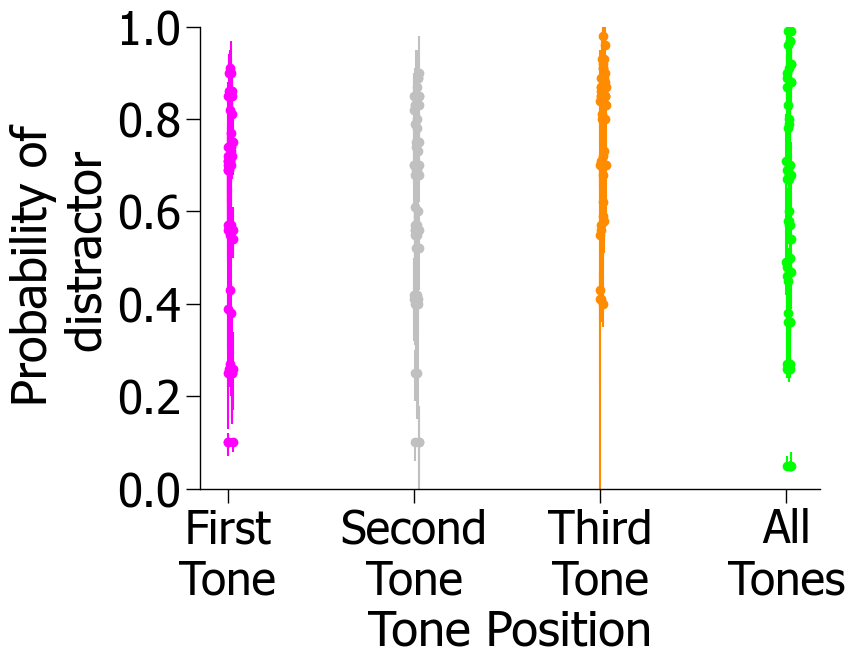

In [3]:
"""
Fig S6G: Difference between pback across tone positions
"""

median_pBackPos1 = computedLikelihoodsNoContextPositionBased['medianPBackPos1'].values
median_pBackPos1 = median_pBackPos1[~np.isnan(median_pBackPos1)]

lowerErrorbars_pBackPos1 = computedLikelihoodsNoContextPositionBased['5thPercentilePBackPos1'].values
lowerErrorbars_pBackPos1 = lowerErrorbars_pBackPos1[~np.isnan(lowerErrorbars_pBackPos1)]

upperErrorbars_pBackPos1 = computedLikelihoodsNoContextPositionBased['95thPercentilePBackPos1'].values
upperErrorbars_pBackPos1 = upperErrorbars_pBackPos1[~np.isnan(upperErrorbars_pBackPos1)]

median_pBackPos2 = computedLikelihoodsNoContextPositionBased['medianPBackPos2'].values
median_pBackPos2 = median_pBackPos2[~np.isnan(median_pBackPos2)]

lowerErrorbars_pBackPos2 = computedLikelihoodsNoContextPositionBased['5thPercentilePBackPos2'].values
lowerErrorbars_pBackPos2 = lowerErrorbars_pBackPos2[~np.isnan(lowerErrorbars_pBackPos2)]

upperErrorbars_pBackPos2 = computedLikelihoodsNoContextPositionBased['95thPercentilePBackPos2'].values
upperErrorbars_pBackPos2 = upperErrorbars_pBackPos2[~np.isnan(upperErrorbars_pBackPos2)]

median_pBackPos3 = computedLikelihoodsNoContextPositionBased['medianPBackPos3'].values
median_pBackPos3 = median_pBackPos3[~np.isnan(median_pBackPos3)]

lowerErrorbars_pBackPos3 = computedLikelihoodsNoContextPositionBased['5thPercentilePBackPos3'].values
lowerErrorbars_pBackPos3 = lowerErrorbars_pBackPos3[~np.isnan(lowerErrorbars_pBackPos3)]

upperErrorbars_pBackPos3 = computedLikelihoodsNoContextPositionBased['95thPercentilePBackPos3'].values
upperErrorbars_pBackPos3 = upperErrorbars_pBackPos3[~np.isnan(upperErrorbars_pBackPos3)]

median_pBack = computedLikelihoodsVeridical['medianPBack'].values
median_pBack = median_pBack[~np.isnan(median_pBack)]

lowerErrorbars_pBack = computedLikelihoodsVeridical['5thPercentilePBack'].values
lowerErrorbars_pBack = lowerErrorbars_pBack[~np.isnan(lowerErrorbars_pBack)]

upperErrorbars_pBack = computedLikelihoodsVeridical['95thPercentilePBack'].values
upperErrorbars_pBack = upperErrorbars_pBack[~np.isnan(upperErrorbars_pBack)]

print("pback values in position 1", np.median(median_pBackPos1), scipy.stats.iqr(median_pBackPos1))
print("pback values in position 2", np.median(median_pBackPos2), scipy.stats.iqr(median_pBackPos2))
print("pback values in position 3", np.median(median_pBackPos3), scipy.stats.iqr(median_pBackPos3))
print("pback values for uniform kernel", np.median(median_pBack), scipy.stats.iqr(median_pBack))


fig, ax = plt.subplots(1,1,figsize=(8,6))
for iSubj in range(56):
    ax.errorbar([1]+np.random.rand(1,)*0.03, median_pBackPos1[iSubj], 
                yerr = [[-lowerErrorbars_pBackPos1[iSubj]+median_pBackPos1[iSubj]],
                      [upperErrorbars_pBackPos1[iSubj]-median_pBackPos1[iSubj]]], marker='o',color='fuchsia')
    ax.errorbar([2]+np.random.rand(1,)*0.03, median_pBackPos2[iSubj], 
                yerr = [[-lowerErrorbars_pBackPos2[iSubj]+median_pBackPos2[iSubj]],
                      [upperErrorbars_pBackPos2[iSubj]-median_pBackPos2[iSubj]]], marker='o',color='silver')
    ax.errorbar([3]+np.random.rand(1,)*0.03, median_pBackPos3[iSubj], 
                yerr = [[-lowerErrorbars_pBackPos3[iSubj]+median_pBackPos3[iSubj]],
                      [upperErrorbars_pBackPos3[iSubj]-median_pBackPos3[iSubj]]], marker='o',color='darkorange')
    ax.errorbar([4]+np.random.rand(1,)*0.03, median_pBack[iSubj], 
                yerr = [[-lowerErrorbars_pBack[iSubj]+median_pBack[iSubj]],
                      [upperErrorbars_pBack[iSubj]-median_pBack[iSubj]]], marker='o',color='lime')
ax.set_xlabel('Tone Position',fontsize=35)
ax.set_xticks(ticks=[1,2,3,4])
ax.set_xticklabels(labels=['First\nTone','Second\nTone','Third\nTone','All\nTones'])
ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_ylabel('Probability of \n distractor',fontsize=35)
ax.tick_params(axis='both',labelsize=33,length=10,width=1)
makeAxesPretty(ax)
fig.savefig('figures/FromProlific/illustrations/relevanceUncertainty_PerTonePosition.pdf',
            bbox_inches="tight",transparent=True) 

#create data
df = pd.DataFrame({'Subject': np.tile(range(1,57), 3),
                   'Position': np.repeat(range(1,4), 56),
                   'PBack': np.concatenate((median_pBackPos1, median_pBackPos2, 
                                            median_pBackPos3),axis=0)})
df.index += 1
print(pg.rm_anova(dv='PBack',within=['Position'],
                  subject='Subject', data=df, effsize='np2'))

print('pos 1 vs pos 2',pg.wilcoxon(median_pBackPos1, median_pBackPos2))
print('pos 1 vs pos 3',pg.wilcoxon(median_pBackPos1, median_pBackPos3))
print('pos 2 vs pos 3',pg.wilcoxon(median_pBackPos2, median_pBackPos3))
print('pos 1 vs all pos',pg.wilcoxon(median_pBackPos1, median_pBack))
print('pos 2 vs all pos',pg.wilcoxon(median_pBackPos2, median_pBack))
print('pos 3 vs all pos',pg.wilcoxon(median_pBackPos3, median_pBack))

median_ss = computedLikelihoodsVeridical['ss'].values
median_ss = median_ss[~np.isnan(median_ss)]

lowerErrorbars_ss = computedLikelihoodsNoContextPositionBased['5thPercentileSS'].values
lowerErrorbars_ss = lowerErrorbars_ss[~np.isnan(lowerErrorbars_ss)]

upperErrorbars_ss = computedLikelihoodsNoContextPositionBased['95thPercentileSS'].values
upperErrorbars_ss = upperErrorbars_ss[~np.isnan(upperErrorbars_ss)]


Correlation of sigma sensory with accuracy            n         r           CI95%         p-val  power
spearman  56 -0.958941  [-0.98, -0.93]  3.146396e-31    1.0


/var/folders/sv/nw4dxg9x4995b2qqc_3d453m0000gn/T/ipykernel_65640/118789582.py:73: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap))
/var/folders/sv/nw4dxg9x4995b2qqc_3d453m0000gn/T/ipykernel_65640/118789582.py:80: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap))
/var/folders/sv/nw4dxg9x4995b2qqc_3d453m0000gn/T/ipykernel_65640/118789582.py:87: MatplotlibDeprecationWarning: Unable to determine 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           4.43e-29
Time:                        13:36:54   Log-Likelihood:                -106.94
No. Observations:                  56   AIC:                             221.9
Df Residuals:                      52   BIC:                             230.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.0272      1.788     49.800      0.0

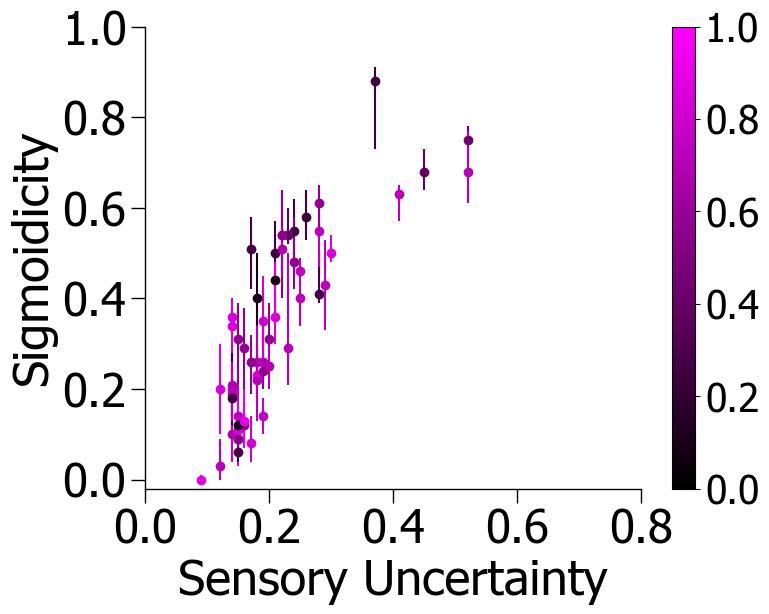

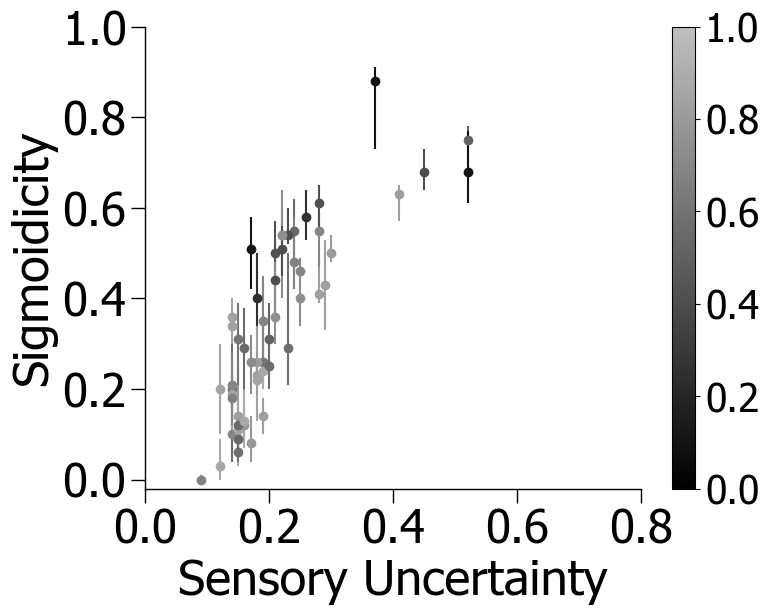

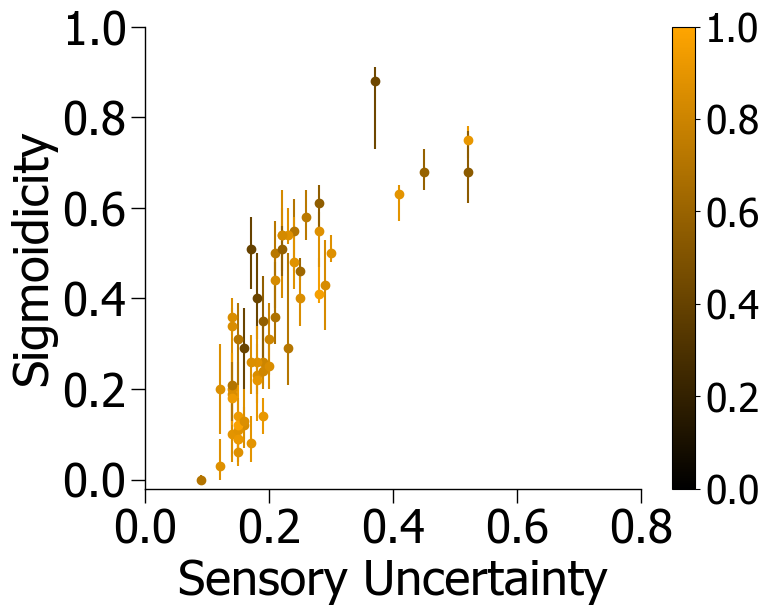

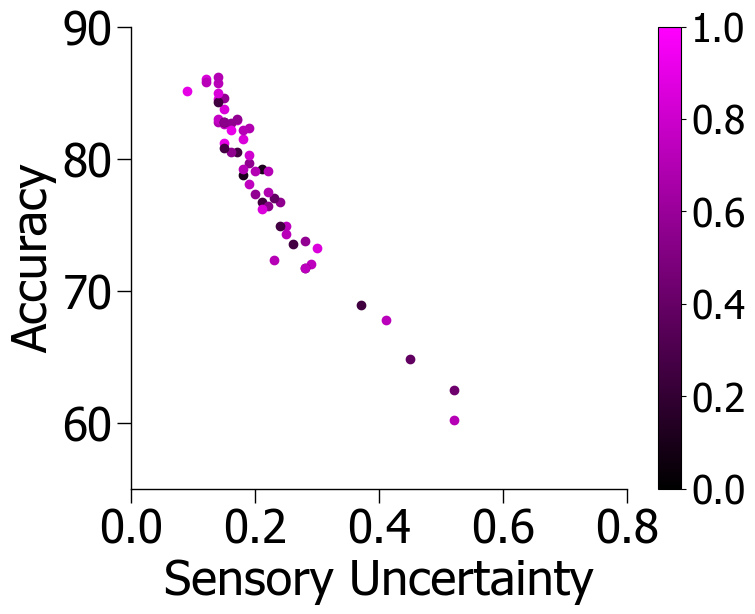

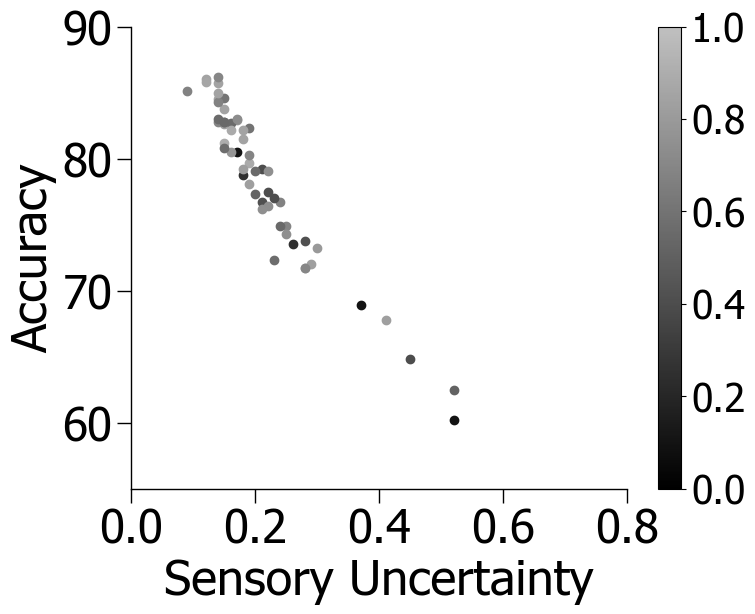

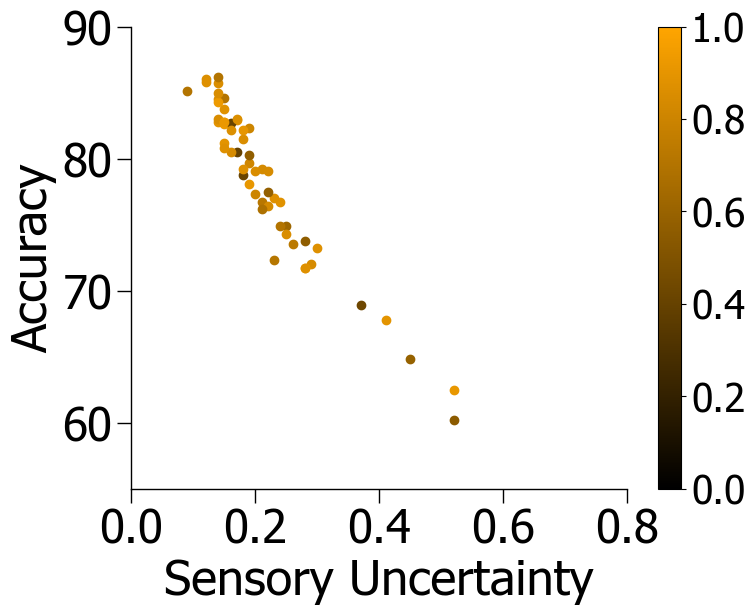

In [4]:
"""
Fig.S6A-F effect of sensory uncertainty and p_distractor on sigmoidicity and accuracy
"""

sigmoidicity_median_Veridical = computedLikelihoodsVeridical['medianRelevanceMetric'].values
sigmoidicity_median_Veridical = sigmoidicity_median_Veridical[~np.isnan(sigmoidicity_median_Veridical)]

sigmoidicity_lowerErrorbars_Veridical = computedLikelihoodsVeridical['5thPercentileRelevanceMetric'].values
sigmoidicity_lowerErrorbars_Veridical = sigmoidicity_lowerErrorbars_Veridical[~np.isnan(sigmoidicity_lowerErrorbars_Veridical)]

sigmoidicity_upperErrorbars_Veridical = computedLikelihoodsVeridical['95thPercentileRelevanceMetric'].values
sigmoidicity_upperErrorbars_Veridical = sigmoidicity_upperErrorbars_Veridical[~np.isnan(sigmoidicity_upperErrorbars_Veridical)]

performance = pd.read_excel(xls,'Strategy_PerformanceAccuracies',nrows = 57)
OverallAccuracy = performance['OverallAccuracyNoContext'].values
OverallAccuracy = OverallAccuracy[~np.isnan(OverallAccuracy)]

print("Correlation of sigma sensory with accuracy",
      pg.corr(median_ss, OverallAccuracy,method='spearman'))

fig1, ax1 = plt.subplots(1,1,figsize=(8,6))
fig2, ax2 = plt.subplots(1,1,figsize=(8,6))
fig3, ax3 = plt.subplots(1,1,figsize=(8,6))
for iSubj in np.arange(len(median_ss)):
    ax1.errorbar(median_ss[iSubj], sigmoidicity_median_Veridical[iSubj], marker='o',
                 yerr=[[-sigmoidicity_lowerErrorbars_Veridical[iSubj]+sigmoidicity_median_Veridical[iSubj]],
                       [sigmoidicity_upperErrorbars_Veridical[iSubj]-sigmoidicity_median_Veridical[iSubj]]],
                 color=[median_pBackPos1[iSubj], 0, median_pBackPos1[iSubj]])
    
    ax2.errorbar(median_ss[iSubj], sigmoidicity_median_Veridical[iSubj], marker='o',
                 yerr=[[-sigmoidicity_lowerErrorbars_Veridical[iSubj]+sigmoidicity_median_Veridical[iSubj]],
                       [sigmoidicity_upperErrorbars_Veridical[iSubj]-sigmoidicity_median_Veridical[iSubj]]],
                 color=[median_pBackPos2[iSubj]*0.75,median_pBackPos2[iSubj]*0.75,median_pBackPos2[iSubj]*0.75])
    
    ax3.errorbar(median_ss[iSubj], sigmoidicity_median_Veridical[iSubj], marker='o',
                 yerr=[[-sigmoidicity_lowerErrorbars_Veridical[iSubj]+sigmoidicity_median_Veridical[iSubj]],
                       [sigmoidicity_upperErrorbars_Veridical[iSubj]-sigmoidicity_median_Veridical[iSubj]]],
                 color=[median_pBackPos3[iSubj],median_pBackPos3[iSubj]*0.65,0])
    
for ax in [ax1,ax2,ax3]:
    ax.set_xticks([0,0.2,0.4,0.6,0.8])
    ax.set_xlabel('Sensory Uncertainty', fontsize=35)
    ax.tick_params(axis='both',labelsize=33,length=10,width=1)   
    ax.set_ylabel('Sigmoidicity', fontsize=35)
    ax.set_ylim([-0.02,1])
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    makeAxesPretty(ax)

fig4, ax4 = plt.subplots(1,1,figsize=(8,6))
fig5, ax5 = plt.subplots(1,1,figsize=(8,6))
fig6, ax6 = plt.subplots(1,1,figsize=(8,6))
for iSubj in np.arange(len(median_ss)):
    ax4.plot(median_ss[iSubj], OverallAccuracy[iSubj], marker='o',
             color=[median_pBackPos1[iSubj], 0, median_pBackPos1[iSubj]])
    
    ax5.plot(median_ss[iSubj], OverallAccuracy[iSubj], marker='o',
             color=[median_pBackPos2[iSubj]*0.75,median_pBackPos2[iSubj]*0.75,median_pBackPos2[iSubj]*0.75])
    
    ax6.plot(median_ss[iSubj], OverallAccuracy[iSubj], marker='o',
             color=[median_pBackPos3[iSubj],median_pBackPos3[iSubj]*0.65,0])
    
for ax in [ax4,ax5,ax6]:
    ax.set_xticks([0,0.2,0.4,0.6,0.8])
    ax.set_xlabel('Sensory Uncertainty', fontsize=35)
    ax.tick_params(axis='both',labelsize=33,length=10,width=1)   
    ax.set_ylabel('Accuracy', fontsize=35)
    ax.set_ylim([55,90])
    makeAxesPretty(ax)
    
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom pink', ['#000000','#FF00FF'], N=256)
norm = matplotlib.colors.Normalize(clip=False)
for fig in [fig1,fig4]:
    cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap))
    tick_font_size = 28
    cbar.ax.tick_params(labelsize=tick_font_size)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom gray', ['#000000','#c0c0c0'], N=256)
norm = matplotlib.colors.Normalize(clip=False)
for fig in [fig2,fig5]:
    cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap))
    tick_font_size = 28
    cbar.ax.tick_params(labelsize=tick_font_size)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom blue', ['#000000','#ffa500'], N=256)
norm = matplotlib.colors.Normalize(clip=False)
for fig in [fig3,fig6]:
    cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap))
    tick_font_size = 28
    cbar.ax.tick_params(labelsize=tick_font_size)


fig1.savefig('figures/FromProlific/illustrations/effectOfSensoryAndRelevanceUncertaintyOnCategoryChoice_Position1.pdf',
            bbox_inches="tight",transparent=True) 
fig2.savefig('figures/FromProlific/illustrations/effectOfSensoryAndRelevanceUncertaintyOnCategoryChoice_Position2.pdf',
            bbox_inches="tight",transparent=True) 
fig3.savefig('figures/FromProlific/illustrations/effectOfSensoryAndRelevanceUncertaintyOnCategoryChoice_Position3.pdf',
            bbox_inches="tight",transparent=True) 
fig4.savefig('figures/FromProlific/illustrations/effectOfSensoryAndRelevanceUncertaintyOnAccuracy_Position1.pdf',
            bbox_inches="tight",transparent=True) 
fig5.savefig('figures/FromProlific/illustrations/effectOfSensoryAndRelevanceUncertaintyOnAccuracy_Position2.pdf',
            bbox_inches="tight",transparent=True) 
fig6.savefig('figures/FromProlific/illustrations/effectOfSensoryAndRelevanceUncertaintyOnAccuracy_Position3.pdf',
            bbox_inches="tight",transparent=True) 


"""
Anova analysis for effect of p_distractor and sigma sensory on accuracy and on category choice
""" 
poly = sklearn.preprocessing.PolynomialFeatures(degree=2,interaction_only=True,include_bias = False)
X_forPoly = np.array([median_ss, median_pBackPos1]).T 
X_withInteraction = poly.fit_transform(X_forPoly)

X_withInteraction = sm.add_constant(X_withInteraction)
model_withInteraction = sm.OLS(OverallAccuracy, X_withInteraction)
results_withInteraction = model_withInteraction.fit()
print(results_withInteraction.summary())

poly = sklearn.preprocessing.PolynomialFeatures(degree=2,interaction_only=True,include_bias = False)
X_forPoly = np.array([median_ss, median_pBackPos1]).T 
X_withInteraction = poly.fit_transform(X_forPoly)

X_withInteraction = sm.add_constant(X_withInteraction)
model_withInteraction = sm.OLS(sigmoidicity_median_Veridical, X_withInteraction)
results_withInteraction = model_withInteraction.fit()
print(results_withInteraction.summary())


In [ ]:
"""
Spearman correlation
"""
print(pg.corr(sigmoidicity_median_Veridical, median_pBackPos1, method='spearman'))
print(pg.corr(sigmoidicity_median_Veridical, median_pBackPos2, method='spearman'))
print(pg.corr(sigmoidicity_median_Veridical, median_pBackPos3, method='spearman'))

print(pg.corr(OverallAccuracy, median_pBackPos1, method='spearman'))
print(pg.corr(OverallAccuracy, median_pBackPos2, method='spearman'))
print(pg.corr(OverallAccuracy, median_pBackPos3, method='spearman'))
